 # Deep Learning: Tp-ANN

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
import numpy as np
import os

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.1'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_full.shape

(60000,)

In [10]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

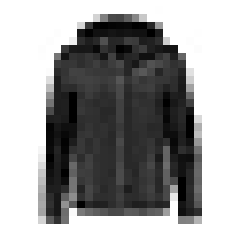

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

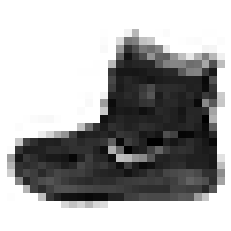

In [18]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

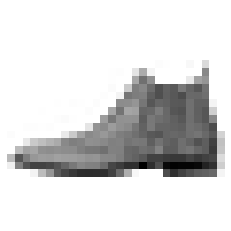

In [19]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [50]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [22]:
class_names[y_train[0]]

'Coat'

Let's take a look at a sample of the images in the dataset:

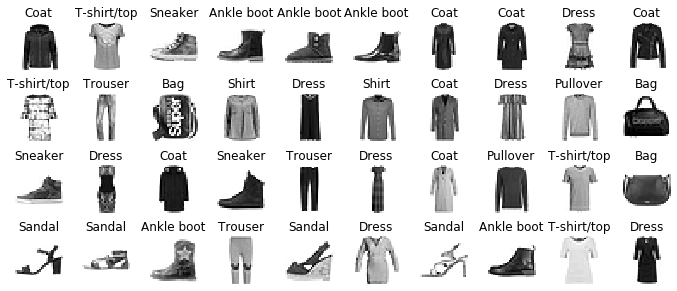

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

# Construct a Model

In [51]:
from IPython.display import Image

## ReLu

In [25]:
Image(url="https://intelligence-artificielle.agency/wp-content/uploads/2018/03/Capture-d’écran-2018-03-06-à-11.38.12.png")

## softmax

In [26]:
Image(url="https://themaverickmeerkat.com/img/softmax/sigmoid_plot.jpg")

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
keras.backend.clear_session()
np.random.seed(42)#?

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[ 0.03107753,  0.0051114 , -0.04602443, ...,  0.01262847,
         0.00738776,  0.01737478],
       [-0.02954444,  0.00574534,  0.01770892, ..., -0.07226982,
        -0.03606499,  0.07219982],
       [-0.05951985,  0.06372052, -0.05115554, ...,  0.05702752,
        -0.04493882,  0.00809323],
       ...,
       [-0.04688379,  0.03341553, -0.00175001, ...,  0.05827144,
        -0.07162615, -0.02342049],
       [ 0.01166056,  0.06417944,  0.05573493, ..., -0.0573824 ,
         0.03002953,  0.01660024],
       [-0.04547242, -0.04335073,  0.00466099, ..., -0.01915218,
         0.06174779,  0.01303404]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

# Compile the Model

Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train the model

Here you can chose how many epochs you need and the batch size.

In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7274 - accuracy: 0.7594 - val_loss: 0.5339 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4902 - accuracy: 0.8297 - val_loss: 0.4708 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4436 - accuracy: 0.8452 - val_loss: 0.4100 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8529 - val_loss: 0.4062 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3969 - accuracy: 0.8597 - val_loss: 0.4072 - val_accuracy: 0.8536
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8663 - val_loss: 0.3812 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3665 - accuracy: 0.8716 - val_loss: 0.3661 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot learning Curves 

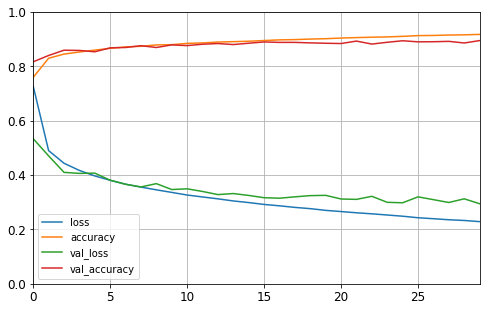

In [43]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8834


[0.3299218416213989, 0.883400022983551]

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

array([[0.000e+00, 0.000e+00, 1.000e-05, 1.000e-05, 0.000e+00, 2.230e-03,
        1.000e-05, 1.575e-02, 3.900e-04, 9.816e-01],
       [1.000e-05, 0.000e+00, 9.972e-01, 0.000e+00, 2.470e-03, 0.000e+00,
        3.200e-04, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]], dtype=float32)

In [46]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

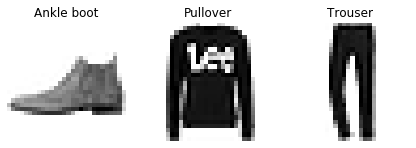

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Exercise

## 1) Plot Learning curves when using different optimizers

https://keras.io/api/optimizers/

### 1-optimizers:Adam

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [70]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2178 - accuracy: 0.9451 - val_loss: 1.4211 - val_accuracy: 0.8832
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2034 - accuracy: 0.9465 - val_loss: 1.1331 - val_accuracy: 0.8818
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1563 - accuracy: 0.9528 - val_loss: 1.1037 - val_accuracy: 0.8860
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1539 - accuracy: 0.9535 - val_loss: 1.1459 - val_accuracy: 0.8900
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1485 - accuracy: 0.9548 - val_loss: 1.1793 - val_accuracy: 0.8886
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1335 - accuracy: 0.9576 - val_loss: 1.1197 - val_accuracy: 0.8878
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1296 - accuracy: 0.9586 - val_loss: 1.0636 - val_accuracy:

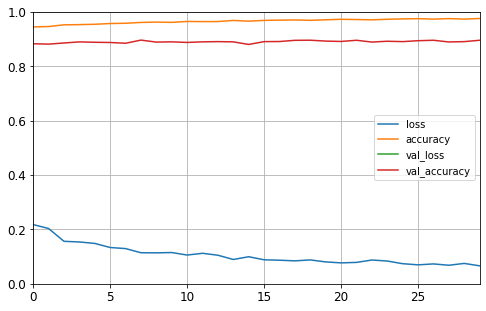

In [71]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2078 - accuracy: 0.8881


[1.2078131437301636, 0.8881000280380249]

### 2-optimizers:Adamax

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adamax",
              metrics=["accuracy"])

In [74]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 1.1858 - val_accuracy: 0.9018
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 1.2187 - val_accuracy: 0.9016
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 1.2678 - val_accuracy: 0.9028
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9930 - val_loss: 1.2903 - val_accuracy: 0.9010
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 1.3136 - val_accuracy: 0.8994
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 1.3028 - val_accuracy: 0.8994
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 1.3207 - val_accuracy:

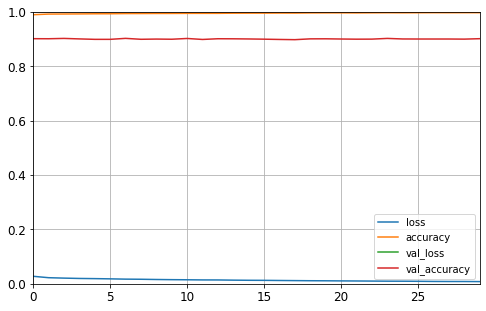

In [75]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [76]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7985 - accuracy: 0.8942


[1.798539400100708, 0.8942000269889832]

### 3-optimizers:RMSprop

In [77]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [78]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0494 - accuracy: 0.9838 - val_loss: 1.6511 - val_accuracy: 0.8978
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0503 - accuracy: 0.9832 - val_loss: 1.7834 - val_accuracy: 0.8988
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 1.7083 - val_accuracy: 0.8978
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 1.9166 - val_accuracy: 0.8980
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 1.9308 - val_accuracy: 0.8970
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0632 - accuracy: 0.9809 - val_loss: 1.9732 - val_accuracy: 0.8966
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0655 - accuracy: 0.9802 - val_loss: 2.0572 - val_acc

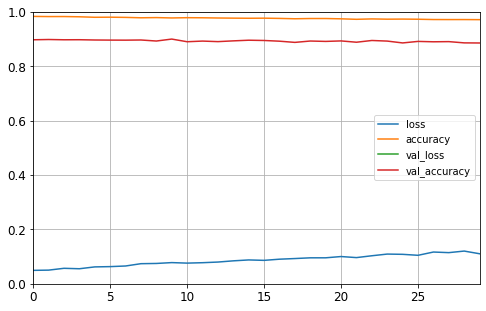

In [79]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [80]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.7464 - accuracy: 0.8713


[2.746389627456665, 0.8712999820709229]

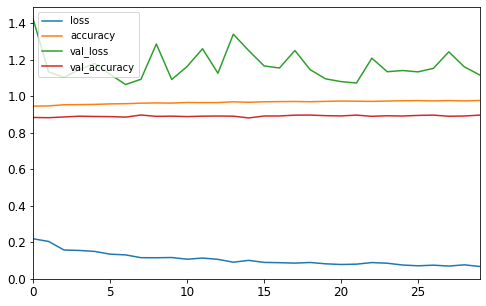

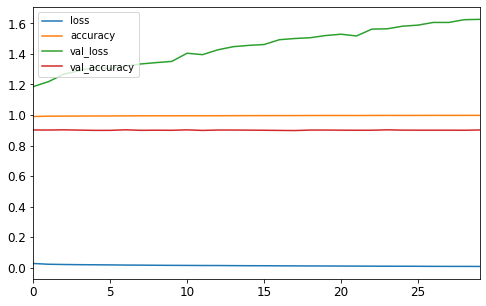

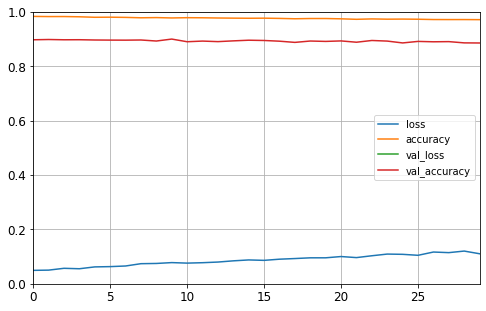

In [81]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 2) Plot Learning curves when using different batch size

In [82]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 1-batch_size=30

In [83]:
history4 = model.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 7s 4ms/step - loss: 84.1237 - accuracy: 0.5212 - val_loss: 1.3214 - val_accuracy: 0.5944
Epoch 2/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.9025 - accuracy: 0.6609 - val_loss: 0.8099 - val_accuracy: 0.7274
Epoch 3/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.6942 - accuracy: 0.7267 - val_loss: 0.9880 - val_accuracy: 0.7338
Epoch 4/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.6208 - accuracy: 0.7507 - val_loss: 0.7786 - val_accuracy: 0.7298
Epoch 5/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.5731 - accuracy: 0.7683 - val_loss: 0.8254 - val_accuracy: 0.7204
Epoch 6/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.5315 - accuracy: 0.7854 - val_loss: 0.6789 - val_accuracy: 0.7760
Epoch 7/30
1834/1834 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.7977 - val_loss: 0.6566 - val_accuracy

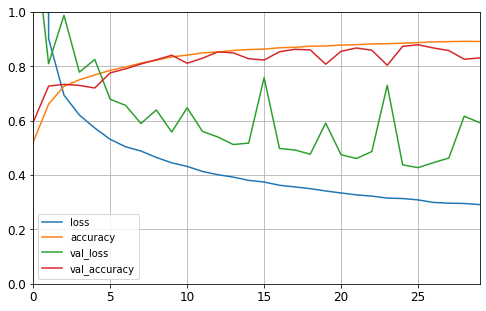

In [84]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [85]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.8151


[0.6640461683273315, 0.8151000142097473]

### 2-batch_size=22

In [86]:
history5 = model.fit(X_train, y_train, batch_size=22, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2500/2500 [==============================] - 12s 5ms/step - loss: 0.3070 - accuracy: 0.8884 - val_loss: 0.5011 - val_accuracy: 0.8534
Epoch 2/30
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2995 - accuracy: 0.8903 - val_loss: 0.4409 - val_accuracy: 0.8670
Epoch 3/30
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2939 - accuracy: 0.8910 - val_loss: 0.4344 - val_accuracy: 0.8796
Epoch 4/30
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2877 - accuracy: 0.8950 - val_loss: 0.4195 - val_accuracy: 0.8746
Epoch 5/30
2500/2500 [==============================] - 9s 3ms/step - loss: 0.2851 - accuracy: 0.8947 - val_loss: 0.4617 - val_accuracy: 0.8738
Epoch 6/30
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2862 - accuracy: 0.8959 - val_loss: 0.4603 - val_accuracy: 0.8752
Epoch 7/30
2500/2500 [==============================] - 9s 3ms/step - loss: 0.2796 - accuracy: 0.8973 - val_loss: 0.4238 - val_accura

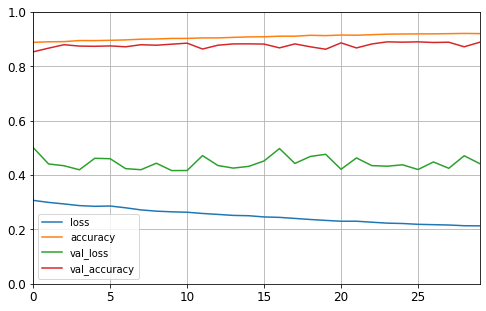

In [87]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [88]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.8733


[0.5049806833267212, 0.8733000159263611]

### 3-batch_size=13

In [89]:
history6 = model.fit(X_train, y_train, batch_size=13, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
4231/4231 [==============================] - 11s 3ms/step - loss: 0.2434 - accuracy: 0.9117 - val_loss: 0.4404 - val_accuracy: 0.8848
Epoch 2/30
4231/4231 [==============================] - 10s 2ms/step - loss: 0.2381 - accuracy: 0.9145 - val_loss: 0.4583 - val_accuracy: 0.8842
Epoch 3/30
4231/4231 [==============================] - 10s 2ms/step - loss: 0.2297 - accuracy: 0.9159 - val_loss: 0.4660 - val_accuracy: 0.8774
Epoch 4/30
4231/4231 [==============================] - 10s 2ms/step - loss: 0.2251 - accuracy: 0.9195 - val_loss: 0.4940 - val_accuracy: 0.8790
Epoch 5/30
4231/4231 [==============================] - 11s 3ms/step - loss: 0.2228 - accuracy: 0.9187 - val_loss: 0.4732 - val_accuracy: 0.8834
Epoch 6/30
4231/4231 [==============================] - 11s 3ms/step - loss: 0.2185 - accuracy: 0.9218 - val_loss: 0.4522 - val_accuracy: 0.8912
Epoch 7/30
4231/4231 [==============================] - 12s 3ms/step - loss: 0.2138 - accuracy: 0.9237 - val_loss: 0.5366 - val_ac

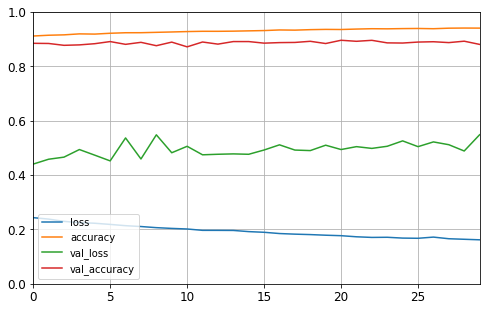

In [90]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [91]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.8688


[0.6142756938934326, 0.8687999844551086]

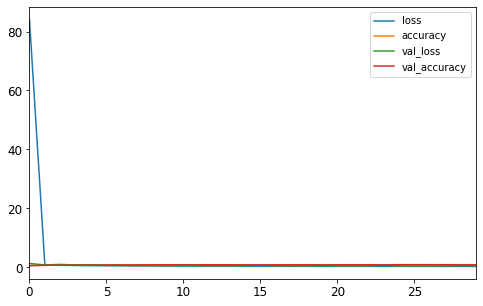

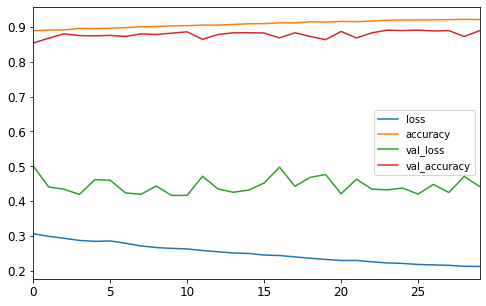

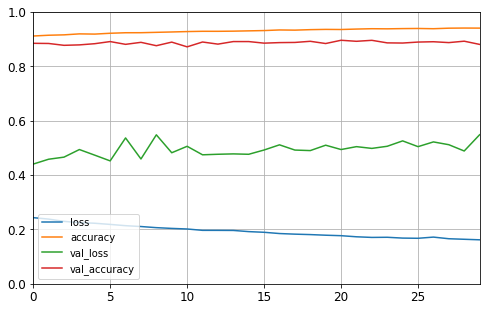

In [92]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 3) Plot Learning curves when using different number of epochs

In [93]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### 1-epochs=10

In [94]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9473 - val_loss: 0.4965 - val_accuracy: 0.8940
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9495 - val_loss: 0.4967 - val_accuracy: 0.8968
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1379 - accuracy: 0.9496 - val_loss: 0.5134 - val_accuracy: 0.8966
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1384 - accuracy: 0.9497 - val_loss: 0.5208 - val_accuracy: 0.8908
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1371 - accuracy: 0.9500 - val_loss: 0.5166 - val_accuracy: 0.8974
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9512 - val_loss: 0.5229 - val_accuracy: 0.8938
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9498 - val_loss: 0.5371 - val_accuracy:

### 2-epochs=50

In [95]:
history8 = model.fit(X_train, y_train, batch_size=50, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1100/1100 [==============================] - 4s 3ms/step - loss: 0.1298 - accuracy: 0.9523 - val_loss: 0.5173 - val_accuracy: 0.8956
Epoch 2/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.1294 - accuracy: 0.9526 - val_loss: 0.5360 - val_accuracy: 0.8924
Epoch 3/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.1287 - accuracy: 0.9531 - val_loss: 0.5206 - val_accuracy: 0.8972
Epoch 4/10
1100/1100 [==============================] - 4s 3ms/step - loss: 0.1284 - accuracy: 0.9529 - val_loss: 0.5297 - val_accuracy: 0.8968
Epoch 5/10
1100/1100 [==============================] - 4s 3ms/step - loss: 0.1277 - accuracy: 0.9542 - val_loss: 0.5305 - val_accuracy: 0.8976
Epoch 6/10
1100/1100 [==============================] - 4s 3ms/step - loss: 0.1272 - accuracy: 0.9529 - val_loss: 0.5450 - val_accuracy: 0.8916
Epoch 7/10
1100/1100 [==============================] - 3s 3ms/step - loss: 0.1270 - accuracy: 0.9539 - val_loss: 0.5299 - val_accuracy:

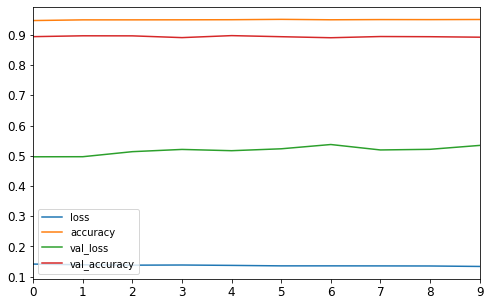

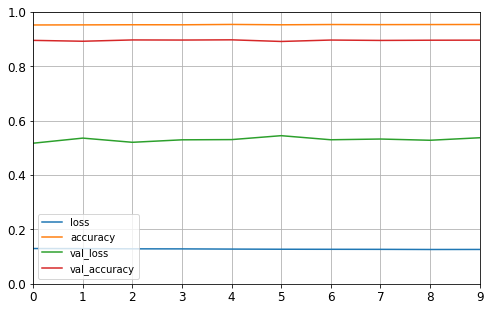

In [96]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 4) repeat with more layers

In [97]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [98]:
model.layers

In [99]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [100]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0651 - accuracy: 0.6195 - val_loss: 0.5677 - val_accuracy: 0.8026
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7049 - accuracy: 0.7476 - val_loss: 0.4802 - val_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6226 - accuracy: 0.7793 - val_loss: 0.4435 - val_accuracy: 0.8432
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5763 - accuracy: 0.7956 - val_loss: 0.4185 - val_accuracy: 0.8530
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5439 - accuracy: 0.8081 - val_loss: 0.4011 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5224 - accuracy: 0.8178 - val_loss: 0.3867 - val_accuracy: 0.8576
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8242 - val_loss: 0.3714 - val_accuracy:

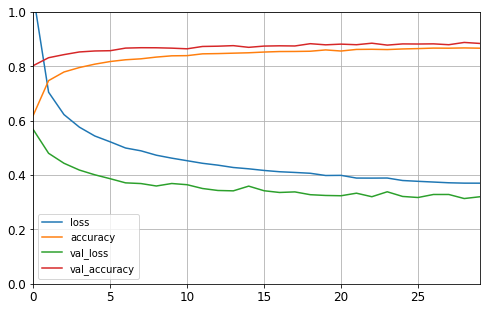

In [101]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [102]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8720


[0.362688809633255, 0.871999979019165]

## 5) apply on different datasets

In [139]:
data =keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [140]:
X_train_full.shape

(60000, 28, 28)

In [147]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [148]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [149]:
y_train

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

In [150]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [151]:
class_names[y_train[0]]

'3'

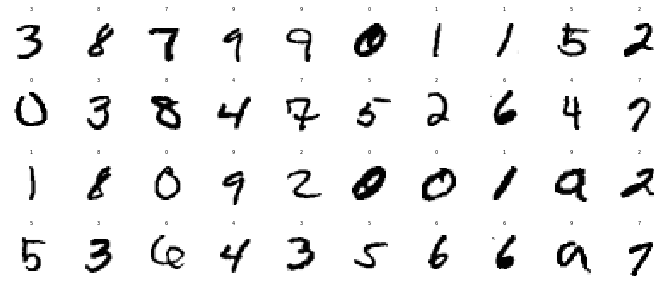

In [152]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=5)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [154]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [155]:
keras.backend.clear_session()
np.random.seed(42)

In [156]:
model.layers

In [157]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [158]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [159]:
model.get_layer(hidden1.name) is hidden1

True

In [160]:
weights, biases = hidden1.get_weights()

In [161]:
weights

array([[ 0.07355821,  0.01027025,  0.07001269, ..., -0.04928518,
         0.00758363, -0.06631483],
       [ 0.02642493,  0.06089847,  0.02675845, ..., -0.01536675,
        -0.06329255, -0.03330378],
       [-0.02804844, -0.03647433, -0.04766374, ..., -0.00523619,
         0.05388296, -0.02242162],
       ...,
       [ 0.04442905,  0.05741191,  0.06098646, ..., -0.00891416,
        -0.06324758,  0.06009617],
       [ 0.04658934, -0.01569564, -0.01342521, ...,  0.03451609,
        -0.00233717, -0.04113607],
       [-0.067095  , -0.04149436, -0.00237116, ...,  0.021579  ,
         0.00246099, -0.03885181]], dtype=float32)

In [162]:
weights.shape

(784, 300)

In [163]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [164]:
biases.shape

(300,)

## Optimizer=sgd

In [165]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [166]:
historyf = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5921 - accuracy: 0.8149 - val_loss: 0.2250 - val_accuracy: 0.9352
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3025 - accuracy: 0.9087 - val_loss: 0.1670 - val_accuracy: 0.9490
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2408 - accuracy: 0.9263 - val_loss: 0.1364 - val_accuracy: 0.9593
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2040 - accuracy: 0.9381 - val_loss: 0.1250 - val_accuracy: 0.9613
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1824 - accuracy: 0.9454 - val_loss: 0.1108 - val_accuracy: 0.9660
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1657 - accuracy: 0.9480 - val_loss: 0.1038 - val_accuracy: 0.9684
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1528 - accuracy: 0.9530 - val_loss: 0.0973 - val_accuracy:

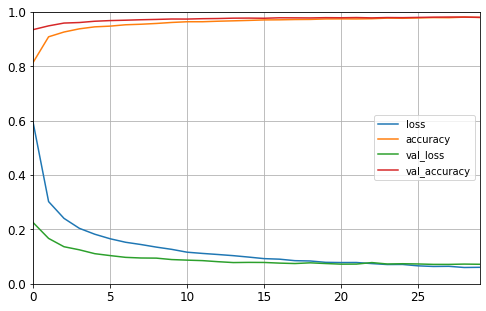

In [167]:
pd.DataFrame(historyf.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [168]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.8259 - accuracy: 0.0974


[2.8258700370788574, 0.09740000218153]

## optimizer=Adam

In [169]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [170]:
historyf1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1859 - accuracy: 0.9410 - val_loss: 0.0882 - val_accuracy: 0.9745
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1462 - accuracy: 0.9545 - val_loss: 0.0872 - val_accuracy: 0.9732
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1305 - accuracy: 0.9590 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1159 - accuracy: 0.9636 - val_loss: 0.0768 - val_accuracy: 0.9757
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1076 - accuracy: 0.9660 - val_loss: 0.0754 - val_accuracy: 0.9762
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0993 - accuracy: 0.9687 - val_loss: 0.0710 - val_accuracy: 0.9779
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0929 - accuracy: 0.9711 - val_loss: 0.0779 - val_accuracy:

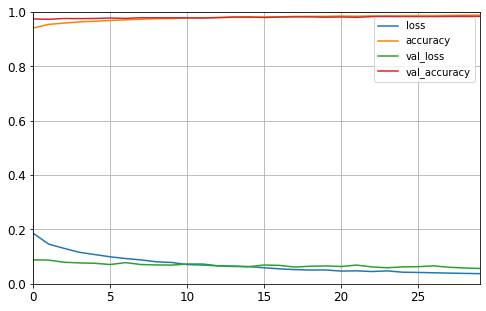

In [171]:
pd.DataFrame(historyf1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [172]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.3836 - accuracy: 0.0974


[3.38362455368042, 0.09740000218153]